In [5]:
from google.colab import files
uploaded = files.upload()

Saving 2022-2023 NBA Player Stats cleaned.csv to 2022-2023 NBA Player Stats cleaned.csv


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade tensorflow

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Accuracy: 0.9629629850387573
Best Parameters: {'batch_size': 16, 'learning_rate': 0.01}
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4627 - loss: 0.7793 - val_accuracy: 0.9540 - val_loss: 0.3593
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9363 - loss: 0.3338 - val_accuracy: 0.9540 - val_loss: 0.2282
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9542 - loss: 0.1948 - val_accuracy: 0.9540 - val_loss: 0.1840
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9590 - loss: 0.1416 - val_accuracy: 0.9540 - val_loss: 0.1603
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9724 - loss: 0.1184 - val_accuracy: 0.9425 - val_loss: 0.1540
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - loss: 0.1005 - val_accuracy: 0.9425 - val_loss: 0.1512
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9612 - loss: 0.1019 - val_accuracy: 0.9425 - val_loss: 0.1495
Epoch 8/50
22/22 ━━━━━━━

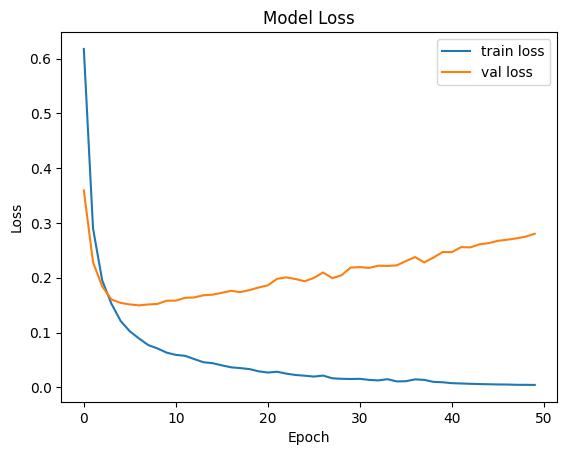

<function matplotlib.pyplot.show(close=None, block=None)>

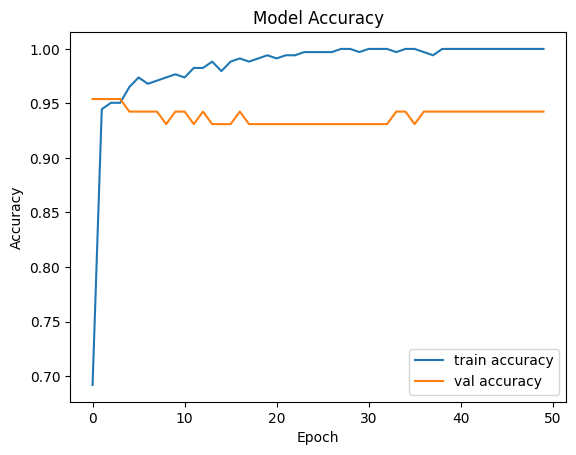

In [15]:
import itertools
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('2022-2023 NBA Player Stats cleaned.csv')
X = df.drop(['allstar_selected', 'Player', 'Pos', 'Tm', 'Rk'], axis=1).values
y = df['allstar_selected'].values


# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

batch_sizes = [16, 32, 64]
learning_rates = [0.01, 0.001, 0.0001]

# Gridsearch
best_accuracy = 0
best_params = {}

for batch_size, lr in itertools.product(batch_sizes, learning_rates):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu',kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.optimizer.lr = lr
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2, verbose=0)

    # evaluate model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'batch_size': batch_size, 'learning_rate': lr}

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters: {best_params}")

# Use the best parameter to train model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.optimizer.lr = best_params['learning_rate']
history = model.fit(X_train, y_train, epochs=50, batch_size=best_params['batch_size'], validation_split=0.2)


model.evaluate(X_test, y_test)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


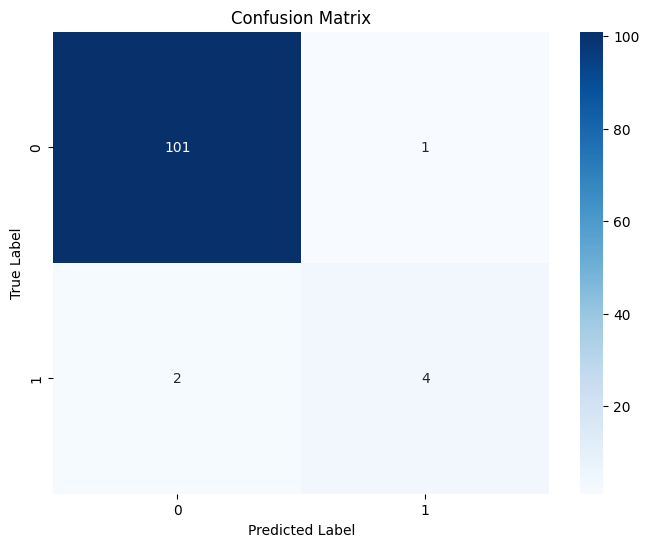

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       102
           1       0.80      0.67      0.73         6

    accuracy                           0.97       108
   macro avg       0.89      0.83      0.86       108
weighted avg       0.97      0.97      0.97       108



In [18]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
predictions = (model.predict(X_test) > 0.5).astype(int)

# build confusion matrix
cm = confusion_matrix(y_test, predictions)

# f1 score
cr = classification_report(y_test, predictions, output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, predictions))



In [ ]:
df_test_B = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv', encoding='ISO-8859-1', sep=";")
# keep only TOT (total) stats for players on multiple teams
df_test_B = df_test_B.drop_duplicates('Player')
# some players' names have question marks
# print(df_test_B[df_test_B['Player'].str.contains('\?', regex=True)])
# correct their names manually
df_test_B.at[55, 'Player'] = 'Davis Bertans'
df_test_B.at[69, 'Player'] = 'Bogdan Bogdanovic'
df_test_B.at[70, 'Player'] = 'Bojan Bogdanovic'
df_test_B.at[162, 'Player'] = 'Luka Doncic'
df_test_B.at[321, 'Player'] = 'Nikola Jokic'
df_test_B.at[331, 'Player'] = 'Nikola JoVic'
df_test_B.at[384, 'Player'] = 'Boban Marjanovic'
df_test_B.at[414, 'Player'] = 'Vasilije Micic'
df_test_B.at[466, 'Player'] = 'Jusuf Nurkic'
df_test_B.at[507, 'Player'] = 'Kristaps Porzingis'
df_test_B.at[549, 'Player'] = 'Luka Samanic'
df_test_B.at[553, 'Player'] = 'Dario Saric'
df_test_B.at[628, 'Player'] = 'Jonas Valanciunas'
df_test_B.at[634, 'Player'] = 'Nikola Vucevic'


# scaler data
X_new_scaled = scaler.transform(X_new.drop(['Player', 'Pos', 'Tm', 'Rk'], axis=1))

# predict
predictions = model.predict(X_new_scaled)
